In [298]:
import numpy.random as random
import numpy as np
import pandas as pd
from IPython.core.display_functions import display

#np.random.seed(42)

In [299]:
n = 100
mA = [1.0, 1.0]
mB = [-1, -1]
sigmaA = 0.5
sigmaB = 0.5

classA = np.vstack((random.randn(1,n) * sigmaA + mA[0], 
          random.randn(1,n) * sigmaA + mA[1]))
tA = np.ones((1,100))

classB = np.vstack((random.randn(1,n) * sigmaB + mB[0], 
          random.randn(1,n) * sigmaB + mB[1]))
tB = -np.ones((1,100))
tB_p = np.zeros((1,100))

data = np.concatenate((classA, classB), axis=1)
data = np.vstack((data, np.ones((1, 200))))

tdata = np.concatenate((tA, tB), axis=1)


def step(X):
  X[X > 0] = 1
  X[X < 0] = 0
  return X


def shuffle(X, y):
  data = np.vstack((X, y))
  trans = data.T
  random.shuffle(trans)
  data = trans.T

  Xnew = data[0:3,:]
  ynew = data[3,:]

  y_delta = ynew.copy()
  y_perceptron = step(ynew)
  return Xnew, y_delta, y_perceptron

X, y_delta, y_perceptron = shuffle(data, tdata)


#display(pd.DataFrame(y_delta))
#display(pd.DataFrame(y_perceptron))

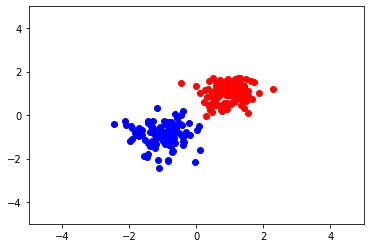

(2, 100)

In [300]:
import matplotlib.pyplot as plt
plt.scatter(classA[0,:], classA[1,:], c="red")
plt.scatter(classB[0,:], classB[1,:], c="blue")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()
display(classA.shape)

In [309]:

epochs = 50

def init_weights(shape):
  #return -np.ones(shape)
  return np.random.random_sample(shape)

pre_initialized_weights = -1.5 * init_weights((1,3)) + np.array((3,0,0))

def step(X):
  X[X > 0] = 1
  X[X < 0] = 0
  return X

def eval_error(X, weights, y_true):
  y_pred = weights @ X
  error = np.sum((y_true - y_pred)**2/2)
  error = round(error, 2)
  return error

def eval_misclassifications(X, weights, y_true):
  y_pred = weights @ X
  y_pred = step(y_pred)
  res = y_pred != y_true
  return np.sum(res)

def plot(classA, classB, weights):
  x = np.linspace(-3, 3, 100)
  y = -weights[0][0]/weights[0][1] * x - weights[0][2]/weights[0][1]

  plt.scatter(classA[0,:], classA[1,:], c="red")
  plt.scatter(classB[0,:], classB[1,:], c="blue")
  plt.plot(x, y)
  plt.xlim(-4, 4)
  plt.ylim(-4, 4)
  plt.show()

12


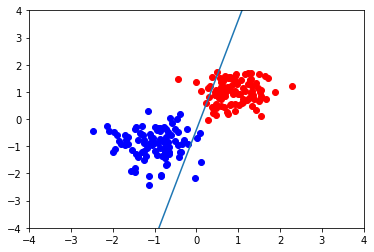

After 1 0/200 12.81
After 2 1/200 14.4
After 3 0/200 12.23
After 4 0/200 15.04
After 5 0/200 12.83
After 6 0/200 11.99
After 7 0/200 11.86
After 8 0/200 12.89
After 9 1/200 13.73
After 10 1/200 14.02
After 11 0/200 15.13
After 12 1/200 14.91
After 13 0/200 12.66
After 14 0/200 12.52
After 15 2/200 15.39
After 16 0/200 12.73
After 17 0/200 12.0
After 18 1/200 12.86
After 19 0/200 12.28
After 20 0/200 16.56
After 21 0/200 12.19
After 22 0/200 13.43
After 23 1/200 14.89
After 24 1/200 16.04
After 25 0/200 14.67
After 26 0/200 14.23
After 27 1/200 13.16
After 28 0/200 13.61
After 29 0/200 14.26
After 30 0/200 12.2
After 31 0/200 13.05
After 32 0/200 12.2
After 33 1/200 19.02
After 34 1/200 13.87
After 35 0/200 16.71
After 36 2/200 15.9
After 37 0/200 11.95
After 38 1/200 12.42
After 39 0/200 12.3
After 40 0/200 13.72
After 41 0/200 12.32
After 42 1/200 12.84
After 43 0/200 12.77
After 44 0/200 11.74
After 45 1/200 15.45
After 46 0/200 12.64
After 47 0/200 15.27
After 48 0/200 12.44
After 4

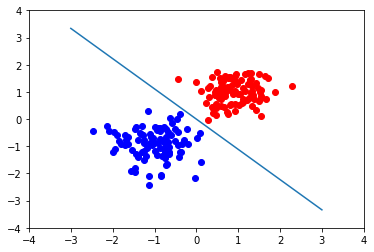

array([[3.75222453e-01, 3.37209678e-01, 3.55052852e-04]])

In [316]:
learning_rate = 0.1

def delta(X, weights, t):
  return -learning_rate * ((weights @ X) - t) @ X.T

weights = pre_initialized_weights.copy()
print(eval_misclassifications(X, weights, y_perceptron))
online_errors = [eval_error(X, weights, y_delta)]

plot(classA, classB, weights)

## online
for epoch in range(1, epochs+1):
  X, y_delta, y_perceptron = shuffle(data, tdata)
  for i, x in enumerate(X.T):
    x = x.reshape(3,1)
    weights += delta(x, weights, y_delta[i])
    mis = eval_misclassifications(X, weights, y_perceptron)
    error = eval_error(X, weights, y_delta)

    online_errors.append(error)
  #plot(classA, classB, weights)
  print("After", epoch, f"{mis}/{X.shape[1]}", error)

plot(classA, classB, weights)

display(weights)


12


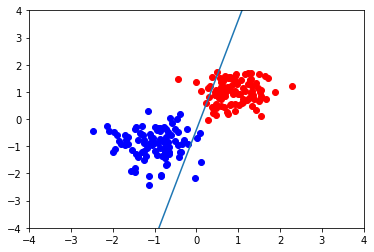

After 1 15/200 168.33
After 2 19/200 129.42
After 3 25/200 109.34
After 4 26/200 96.73
After 5 25/200 87.45
After 6 25/200 79.9
After 7 25/200 73.43
After 8 21/200 67.72
After 9 19/200 62.63
After 10 17/200 58.05
After 11 17/200 53.9
After 12 17/200 50.14
After 13 14/200 46.73
After 14 12/200 43.62
After 15 10/200 40.8
After 16 9/200 38.22
After 17 8/200 35.88
After 18 8/200 33.74
After 19 7/200 31.79
After 20 7/200 30.01
After 21 6/200 28.39
After 22 6/200 26.91
After 23 6/200 25.56
After 24 6/200 24.33
After 25 5/200 23.21
After 26 5/200 22.19
After 27 5/200 21.25
After 28 4/200 20.4
After 29 4/200 19.62
After 30 4/200 18.92
After 31 2/200 18.27
After 32 2/200 17.68
After 33 2/200 17.14
After 34 2/200 16.65
After 35 2/200 16.21
After 36 2/200 15.8
After 37 1/200 15.43
After 38 1/200 15.09
After 39 0/200 14.78
After 40 0/200 14.49
After 41 0/200 14.24
After 42 0/200 14.0
After 43 0/200 13.79
After 44 0/200 13.59
After 45 0/200 13.41
After 46 0/200 13.25
After 47 0/200 13.1
After 48 0/

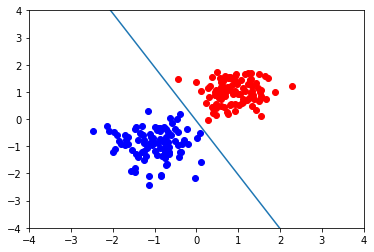

array([[0.61621914, 0.31087446, 0.02056337]])

In [317]:
learning_rate = 0.001
#does not converge for too high learning rate -> oscilates with lr=0.01

weights = pre_initialized_weights.copy()
print(eval_misclassifications(X, weights, y_perceptron))
batch_errors = [eval_error(X, weights, y_delta)]

plot(classA, classB, weights)

## batch
for epoch in range(1, epochs+1):
  weights += delta(X, weights, y_delta)
  mis = eval_misclassifications(X, weights, y_perceptron)
  error = eval_error(X, weights, y_delta)
  batch_errors.append(error)
  print("After", epoch, f"{mis}/{X.shape[1]}", error)
  #plot(classA, classB, weights)

plot(classA, classB, weights)
display(weights)


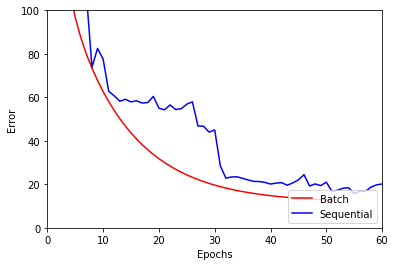

In [318]:
plt.plot(range(1, len(batch_errors)+1), np.array(batch_errors), c="red", label="Batch")
plt.plot(range(1, len(online_errors)+1), np.array(online_errors), c="blue", label="Sequential")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.ylim(0, 100)
plt.xlim(0, 60)
plt.legend(loc="lower right")
plt.show()

Compare sequential with a batch learning approach for the delta rule. 

How quickly (in terms of epochs) do the algorithms converge?
-> depends on how bad the starting configuration was
Batch takes longer to converge.
Sequential always finishes in one epoch while batch needs many more.

Please adjust the learning rate and plot the learning curves for each variant. 
-> Batch mode is very sensible to learning rate changes. While online mode changes only convergence speed in range ~0.1-0.001. Batch mode oscilates for lr higher than ~0.003.


How sensitive is learning to random initialisation?
Random initialization slightly changes the amount of epochs.


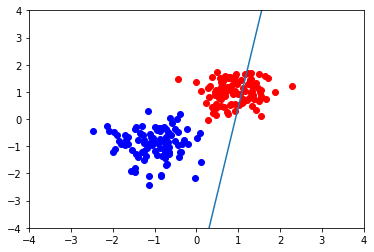

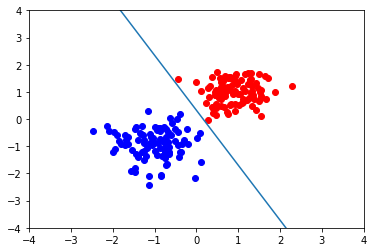

In [305]:
learning_rate = 0.1
epochs = 100

X, y_delta, y_perceptron = shuffle(data, tdata)

def perceptron(X, weights, target):
  X = X.reshape(3,1)
  return -learning_rate * (step(weights @ X) - target) @ X.T

weights = -1.5 * init_weights((1,3)) + np.array((3,0,0))

plot(classA, classB, weights)

for epoch in range(1, epochs+1):
  for i, x in enumerate(X.T):
    weights += perceptron(x, weights, y_perceptron[i])

plot(classA, classB, weights)

[[ 1.51419864 -0.93197839]]


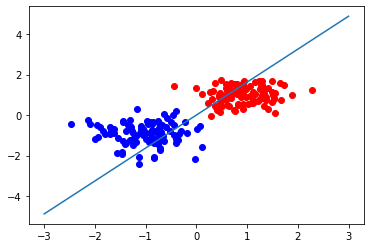

array([[0.46785914, 0.46027839]])

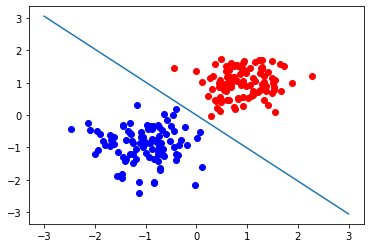

In [306]:
def plot_no_bias(classA, classB, weights):
  x = np.linspace(-3, 3, 100)
  y = -weights[0][0]/weights[0][1] * x

  plt.scatter(classA[0,:], classA[1,:], c="red")
  plt.scatter(classB[0,:], classB[1,:], c="blue")
  plt.plot(x, y)
  plt.show()


learning_rate = 0.0001
epochs = 1000

weights = -1.5 * init_weights((1,2)) + np.array((3,0))
print(weights)
plot_no_bias(classA, classB, weights)

## batch
X_nbias = X[0:2,:]
y_nbias = y_delta

for epoch in range(1, epochs+1):
  ## online
  #for i, x in enumerate(X_nbias.T):
  #  x = x.reshape(2,1)
  #  weights += delta(x, weights, y_delta[i], learning_rate)
  ## batch
  weights += delta(X_nbias, weights, y_delta)

display(weights)
plot_no_bias(classA, classB, weights)
